## Data science basics

In this tutorial, you will learn how to:

* Visualise time series data
* Plot distribution of daily percentage change
* Plot and compute cumulative daily returns
* Use moving windows
* Plot and compute volatility

<hr size="5"/>

### Table of Contents

* [1. Exploratory Data Analysis (EDA)](#1.-Exploratory-Data-Analysis)
* [2. Resampling](#2.-Resampling)
* [3. Calculate percentage change](#3.-Calculate-percentage-change)
* [4. Visualising time series data](#4.-Visualising-time-series-data)
* [5. Moving windows](#5.-Moving-windows)


Requirements:
 * [pandas](https://pypi.org/project/pandas/)
 * [matplotlib](https://matplotlib.org/)
 * [numpy](https://numpy.org/)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Exploratory Data Analysis (EDA)

In [2]:
aapl = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_AAPL.csv', header=0, index_col='Date', parse_dates=True)

# inspect first rows
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.405683,0.407447,0.405683,0.405683,117258400
1980-12-15,0.386281,0.386281,0.384517,0.384517,43971200
1980-12-16,0.358060,0.358060,0.356296,0.356296,26432000
1980-12-17,0.365115,0.366879,0.365115,0.365115,21610400
1980-12-18,0.375698,0.377462,0.375698,0.375698,18362400


In [3]:
aapl.describe()

,Open,High,Low,Close,Volume
count,9984.000000,9984.000000,9984.000000,9984.000000,9.984000e+03
mean,32.670008,33.007438,32.341316,32.687911,8.545261e+07
std,61.777306,62.438891,61.197083,61.856932,8.576200e+07
min,0.156982,0.156982,0.155218,0.155218,3.472000e+05
25%,0.918610,0.937983,0.898934,0.919462,3.291708e+07
50%,1.469656,1.499504,1.442897,1.471641,5.730830e+07
75%,32.676983,32.967922,32.224967,32.592890,1.065642e+08
max,395.959991,399.820007,385.959991,390.899994,1.855410e+09


In [4]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9984 entries, 1980-12-12 to 2020-07-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9984 non-null   float64
 1   High    9984 non-null   float64
 2   Low     9984 non-null   float64
 3   Close   9984 non-null   float64
 4   Volume  9984 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 468.0 KB


In [5]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
last_open = aapl['Open'][-10:]
print(last_open)

# check type of data
type(last_open)

Date
2020-07-06    370.000000
2020-07-07    375.410004
2020-07-08    376.720001
2020-07-09    385.049988
2020-07-10    381.339996
2020-07-13    389.059998
2020-07-14    379.359985
2020-07-15    395.959991
2020-07-16    386.250000
2020-07-17    387.950012
Name: Open, dtype: float64


pandas.core.series.Series

In [7]:
print(aapl.loc[pd.Timestamp('2020-07-01'):pd.Timestamp('2020-07-17')])

                  Open        High         Low       Close    Volume
Date                                                                
2020-07-01  365.119995  367.359985  363.910004  364.109985  27638400
2020-07-02  367.850006  370.470001  365.670013  367.720001  16775857
2020-07-02  367.850006  370.470001  363.640015  364.109985  28510400
2020-07-06  370.000000  375.779999  369.869995  373.850006  29663900
2020-07-07  375.410004  378.619995  372.230011  372.690002  28106100
2020-07-08  376.720001  381.500000  376.359985  381.369995  29273000
2020-07-09  385.049988  385.269989  378.690002  383.010010  31410700
2020-07-10  381.339996  383.920013  378.820007  383.679993  22564300
2020-07-13  389.059998  399.820007  381.029999  381.910004  47912300
2020-07-14  379.359985  389.019989  375.510010  388.230011  42747300
2020-07-15  395.959991  396.989990  385.959991  390.899994  38299500
2020-07-16  386.250000  389.619995  383.619995  386.089996  27644400
2020-07-17  387.950012  388.589996

In [8]:
# Inspect the first rows of 2007 
print(aapl.loc['2017-06'].head())

                  Open        High         Low       Close    Volume
Date                                                                
2017-06-01  146.811877  146.965239  145.901315  146.821457  16404100
2017-06-02  147.204882  148.997253  146.543522  148.997253  27770700
2017-06-05  147.933298  148.038732  147.089837  147.540314  25331700
2017-06-06  147.511570  149.342289  147.396556  148.038742  26624900
2017-06-07  148.585115  149.505257  148.067523  148.920578  21069600


In [9]:
# We select only the data from 2006 to 2019
aapl = aapl.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2019-12-31')]

aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,8.951311,9.244411,8.935233,9.244411,201808600
2006-01-04,9.291406,9.396526,9.213494,9.271619,154900900
2006-01-05,9.254306,9.262963,9.120741,9.198654,112355600
2006-01-06,9.306246,9.485569,9.219676,9.436100,176114400
2006-01-09,9.489279,9.547404,9.366845,9.405183,168760200


### 2. Resampling

In [10]:
sample = aapl.sample(10)
print(sample)

                  Open        High         Low       Close     Volume
Date                                                                 
2008-07-03   20.973374   21.292446   20.498478   21.038919  130840500
2006-06-14    7.207549    7.269384    7.010912    7.124689  219534000
2018-01-18  173.219922  173.924903  172.138328  173.113693   31193400
2006-11-10   10.332716   10.338899   10.202861   10.279537   93466100
2008-01-18   19.998843   20.498474   19.739133   19.955557  431085900
2019-11-18  264.454791  266.076547  262.892760  265.748230   21675800
2009-07-01   17.746796   17.890255   17.625599   17.663937  103544700
2011-01-25   41.594290   42.226249   41.376631   42.221302  136717000
2011-05-18   41.611600   42.178013   41.553475   42.032082   83694100
2014-04-07   67.939946   68.310515   67.151208   67.354500   72462600


In [17]:
# Resample to monthly level
monthly_aapl = aapl.resample('M').mean()
print(monthly_aapl)

                  Open        High         Low       Close        Volume
Date                                                                    
2006-01-31    9.646837    9.826964    9.463248    9.622845  2.734796e+08
2006-02-28    8.666998    8.799066    8.449467    8.597482  2.468513e+08
2006-03-31    7.977159    8.082119    7.819936    7.919303  2.520938e+08
2006-04-30    8.305358    8.426230    8.158384    8.286417  2.647274e+08
2006-05-31    8.347965    8.422168    8.167743    8.259034  1.773725e+08
...                ...         ...         ...         ...           ...
2019-08-31  203.405757  205.731611  201.016033  203.104356  3.095794e+07
2019-09-30  215.977168  217.706653  214.203542  216.242517  2.712836e+07
2019-10-31  233.040943  235.064113  231.072548  233.395029  2.644794e+07
2019-11-30  260.217583  261.974837  258.773602  261.038866  2.241658e+07
2019-12-31  273.997682  276.477449  272.482059  275.126224  2.843803e+07

[168 rows x 5 columns]


In [19]:
# Resample to minutely level
minutely_aapl = aapl.resample('T').ffill()
print(minutely_aapl)

                           Open        High         Low       Close     Volume
Date                                                                          
2006-01-03 00:00:00    8.951311    9.244411    8.935233    9.244411  201808600
2006-01-03 00:01:00    8.951311    9.244411    8.935233    9.244411  201808600
2006-01-03 00:02:00    8.951311    9.244411    8.935233    9.244411  201808600
2006-01-03 00:03:00    8.951311    9.244411    8.935233    9.244411  201808600
2006-01-03 00:04:00    8.951311    9.244411    8.935233    9.244411  201808600
...                         ...         ...         ...         ...        ...
2019-12-30 23:56:00  287.995045  291.208709  283.776513  290.044617   36028600
2019-12-30 23:57:00  287.995045  291.208709  283.776513  290.044617   36028600
2019-12-30 23:58:00  287.995045  291.208709  283.776513  290.044617   36028600
2019-12-30 23:59:00  287.995045  291.208709  283.776513  290.044617   36028600
2019-12-31 00:00:00  288.462644  292.193665  288.054

In [93]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

print(aapl.head())

# Delete the new `diff` column
del aapl['diff']

                Open      High       Low     Close     Volume      diff
Date                                                                   
2006-01-03  8.951311  9.244411  8.935233  9.244411  201808600 -0.293101
2006-01-04  9.291406  9.396526  9.213494  9.271619  154900900  0.019787
2006-01-05  9.254306  9.262963  9.120741  9.198654  112355600  0.055652
2006-01-06  9.306246  9.485569  9.219676  9.436100  176114400 -0.129854
2006-01-09  9.489279  9.547404  9.366845  9.405183  168760200  0.084097


### 3. Calculate percentage change

In [21]:
daily_close = aapl[['Close']]

# Calculate daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change.head())

               Close
Date                
2006-01-03  0.000000
2006-01-04  0.002943
2006-01-05 -0.007870
2006-01-06  0.025813
2006-01-09 -0.003276


In [22]:
# Calculate daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns.head())

               Close
Date                
2006-01-03       NaN
2006-01-04  0.002939
2006-01-05 -0.007901
2006-01-06  0.025486
2006-01-09 -0.003282


In [23]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate monthly percentage change
monthly.pct_change().tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-08-30,-0.025236,-0.045717,-0.015678,-0.016461,-0.694819
2019-09-30,0.051104,0.067142,0.065589,0.072962,0.228629
2019-10-31,0.119240,0.109493,0.074596,0.110684,0.339260
2019-11-29,0.081542,0.078800,0.124076,0.077554,-0.665012
2019-12-31,0.087509,0.095821,0.088830,0.098784,1.162394


In [24]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate quarterly percentage change
quarter.pct_change().tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-09-30,0.169907,0.166745,0.172115,0.170176,-0.223827
2019-01-31,-0.089344,-0.085867,-0.097034,-0.091758,0.511812
2019-05-31,0.019615,0.017389,0.027790,0.023316,-0.310644
2019-09-30,0.104137,0.103838,0.103444,0.102620,-0.077098
2020-01-31,0.255415,0.253627,0.257661,0.258518,-0.019039


In [25]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
daily_pct_change.tail()

,Close
Date,
2019-12-24,0.000951
2019-12-26,0.019840
2019-12-27,-0.000380
2019-12-30,0.005935
2019-12-31,0.007306


### 4. Visualising time series data

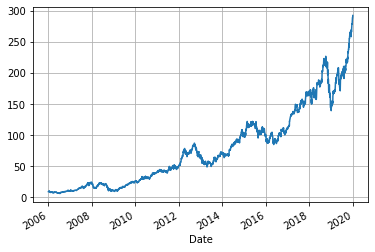

In [26]:
# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

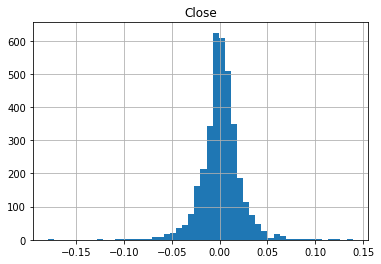

             Close
count  3522.000000
mean      0.001181
std       0.020003
min      -0.179196
25%      -0.008113
50%       0.000949
75%       0.011245
max       0.139049


In [100]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

### Cumulative daily rate of return

In [33]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
cum_daily_return.tail()

,Close
Date,
2019-12-24,30.594841
2019-12-26,31.201854
2019-12-27,31.190013
2019-12-30,31.375131
2019-12-31,31.604372


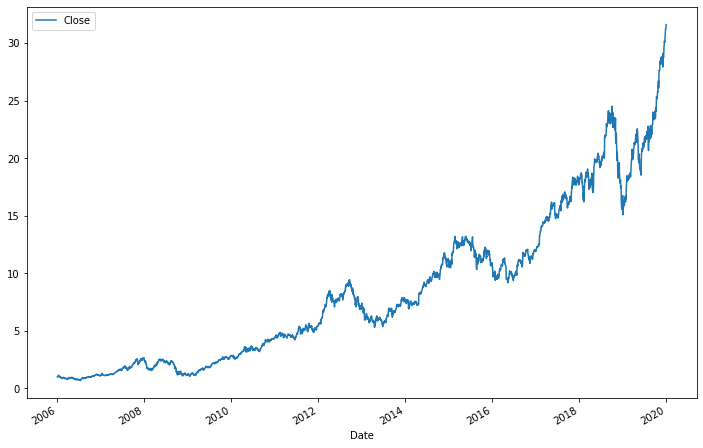

In [34]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [35]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
cum_monthly_return.tail()

,Close
Date,
2019-08-31,21.970501
2019-09-30,23.391702
2019-10-31,25.247149
2019-11-30,28.237478
2019-12-31,29.761356


### 5. Moving windows

In [108]:
# Isolate the closing prices 
close_px = aapl['Close']

# Calculate the moving average
moving_avg = close_px.rolling(window=40).mean()

# Inspect the result
moving_avg.tail()

Date
2019-12-24    264.221056
2019-12-26    265.398771
2019-12-27    266.574494
2019-12-30    267.656605
2019-12-31    268.616614
Name: Close, dtype: float64

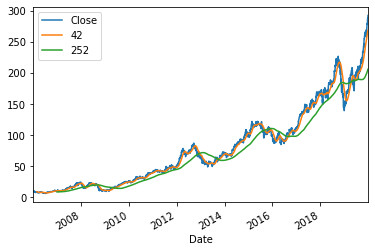

In [109]:
# Short moving window rolling mean
aapl['42'] = close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Close', '42', '252']].plot()

# Show plot
plt.show()

### References:
* [Algorithmic trading explained](https://www.youtube.com/watch?v=73fnrywIhl8) (Youtube video)
* [DataCamp - Python for Finance: Algorithmic Trading](https://www.datacamp.com/community/tutorials/finance-python-trading?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=255798340456&utm_targetid=aud-299261629574:dsa-473406585355&utm_loc_interest_ms=&utm_loc_physical_ms=1009279&gclid=Cj0KCQjwrIf3BRD1ARIsAMuugNu2UkliuXEzSS4V08jCIQPtBByx7Eu8tEZh0J34NJ395kpOC_t0-MUaAtF5EALw_wcB)